In [24]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap
from matplotlib.lines import Line2D
from sklearn.manifold import TSNE

plt.rc("font", family="Times New Roman")

In [35]:
def read_features_labels(model):
    features, labels = [], []
    for file in ["", "(0)", "(1)", "(2)", "(3)"]:
        data = np.load(f"npz/{model}-LibriSeVoc_cross_method/test{file}.npz")

        _feature = data["feature"]
        _label = data["label"]
        print(data)
        try:
            _vocoder_label = data["vocoder_label"]
        except KeyError:
            _vocoder_label = data["vocoder_label_org"]
            
        features.append(_feature)
        labels.append(_vocoder_label)
    features = np.concatenate(features)
    labels = np.concatenate(labels)

    print(f"For {model}, Read features {features.shape}")

    return features, labels

In [26]:
markers = ["o", "^", "*", "D", "p", "X", "P"]
cmap = ["red", "#ff00e7", "blue", "green", "black", "#f796cc", "#00ff11"]
vocoders = ['Real', 'PWG', 'Diffwave', 'WaveNet', 'WaveRNN', 'MelGAN', 'WaveGrad']

In [27]:
def select_features(features, labels, N=300):
    """
    select n features for t_SNE and visulization
    """
    selected_features = []
    for i in range(7):
        index = np.where(labels == i)[0]
        index = np.random.choice(index, N)
        selected_features.append(features[index])
    selected_features = np.concatenate(selected_features)
    return selected_features

In [28]:
def get_tSNE_res(features):
    tsne = TSNE(
        n_components=2,
        random_state=RANDOM_STATE,
        perplexity=10,
        learning_rate=50,
    )
    result = tsne.fit_transform(features)
    return result

In [29]:
def plot_tSNE_res(result, N=300, save_path=None):
    plt.figure(figsize=(5,5))
    
    for i in range(7):
        start = i * N
        end = start + N
        plt.scatter(
            result[start:end, 0],
            result[start:end, 1],
            facecolors="none",
            edgecolors=cmap[i],
            s=25,
            linewidth=1,
            marker=markers[i],
        )
    plt.xticks([])
    plt.yticks([])
    if save_path is not None:
        plt.savefig(save_path, dpi=500, bbox_inches="tight")

    plt.show()

In [30]:
def plot_and_save(model, N, save_path=None):
    features, labels = read_features_labels(model)
    selected_features = select_features(features, labels, N=N)
    t_SNE_res = get_tSNE_res(selected_features)
    plot_tSNE_res(t_SNE_res, N=N, save_path=save_path)

In [31]:
cmap = ["red", "#ff00e7", "blue", "#ffff00", "black", "#008000", "#00ff11"]

NpzFile 'npz/Wave2Vec2-LibriSeVoc_cross_method/test.npz' with keys: feature, label, vocoder_label
NpzFile 'npz/Wave2Vec2-LibriSeVoc_cross_method/test(0).npz' with keys: feature, label, vocoder_label
NpzFile 'npz/Wave2Vec2-LibriSeVoc_cross_method/test(1).npz' with keys: feature, label, vocoder_label
NpzFile 'npz/Wave2Vec2-LibriSeVoc_cross_method/test(2).npz' with keys: feature, label, vocoder_label
NpzFile 'npz/Wave2Vec2-LibriSeVoc_cross_method/test(3).npz' with keys: feature, label, vocoder_label
For Wave2Vec2, Read features (71290, 768)


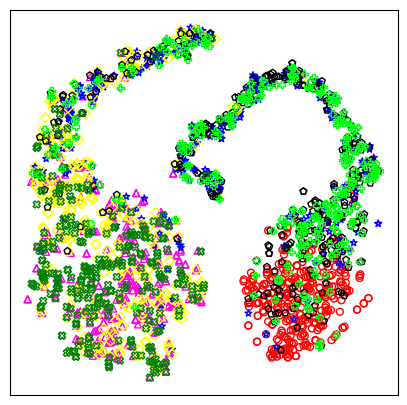

In [40]:
RANDOM_STATE = 1
models = [
    # "AASIST",
    # "LCNN",
    # "RawNet2",
    "Wave2Vec2",
    # "WaveLM",
    # "LibriSeVoc",
    # "Wav2Clip",
    # "AudioClip",
    # "RawGAT",
    # "Ours/ResNet",
    # "ASDG",
    # "SFATNet",
    # "OursMultiView2",
]

for model in models:
    model = model.replace("/", "-")
    N = 300
    save_path = f"pngs/{model}-LibriSeVoc_cross_method.png"
    plot_and_save(model, N, save_path)

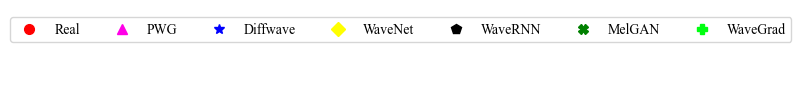

In [105]:
marker_handles = [
    Line2D(
        [],
        [],
        color=cmap[i],
        marker=markers[i],
        linestyle="None",
        markersize=7,
        # mfc="white",
    )
    for i in range(len(markers))
]

plt.figure(figsize=(5,1))
plt.legend(
    handles=marker_handles,
    labels=vocoders,
    handler_map={tuple: matplotlib.legend_handler.HandlerTuple(None)},
    ncol=len(vocoders)
)
plt.axis('off')
plt.savefig("pngs/Legend_LibriSeVoc_cross_method.pdf", dpi=500, bbox_inches="tight")
plt.show()

In [106]:
!pdfcrop pngs/Legend_LibriSeVoc_cross_method.pdf pngs/Legend_LibriSeVoc_cross_method.pdf

PDFCROP 1.40, 2020/06/06 - Copyright (c) 2002-2020 by Heiko Oberdiek, Oberdiek Package Support Group.
==> 1 page written on `pngs/Legend_LibriSeVoc_cross_method.pdf'.


In [107]:
!zip pngs.zip -r pngs

updating: pngs/ (stored 0%)
updating: pngs/WaveLM-LibriSeVoc_cross_method.png (deflated 2%)
updating: pngs/.ipynb_checkpoints/ (stored 0%)
updating: pngs/.ipynb_checkpoints/hist_en_ch-checkpoint.pdf (deflated 28%)
updating: pngs/.ipynb_checkpoints/WaveLM-LibriSeVoc_cross_method-checkpoint.png (deflated 2%)
updating: pngs/RawNet2-LibriSeVoc_cross_method.png (deflated 3%)
updating: pngs/LCNN-LibriSeVoc_cross_method.png (deflated 2%)
updating: pngs/LibriSeVoc-LibriSeVoc_cross_method.png (deflated 2%)
updating: pngs/Legend_LibriSeVoc_cross_method.pdf (deflated 28%)
updating: pngs/hist_en_ch.pdf (deflated 29%)
updating: pngs/Wav2Clip-LibriSeVoc_cross_method.png (deflated 4%)
updating: pngs/Wave2Vec2-LibriSeVoc_cross_method.png (deflated 2%)
updating: pngs/RawGAT-LibriSeVoc_cross_method.png (deflated 2%)
updating: pngs/AudioClip-LibriSeVoc_cross_method.png (deflated 3%)
updating: pngs/Ours-ResNet-LibriSeVoc_cross_method.png (deflated 3%)
updating: pngs/AASIST-LibriSeVoc_cross_method.png (def